# Arrests Data

In [5]:
# imports
import pandas as pd
file = pd.read_csv("arrests.csv")
file

,_id,Template,Case_Number,ArrestPerson_ID,Arrest_Date,Arrest_Year,Arrest_Month,Arrest_Time,Type,ArrestPerson_Age,...,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,Zone,Tract,Neighborhood,ArrestCharge_Felony_Misdemeanor_Description,XCOORD,YCOORD,Block_Address
0,1,Adult Arrest-On View,PGHP25000026,b09e1066-c355-cc1b-218c-08dd2a4354ea,2025-01-01T00:00:00,2025.0,Jan,04:04,On-View Arrest (apprehension without a warrant...,21.0,...,Society,B,18 5503 A1* Disorderly Conduct-Fighting/Threat...,Zone 3,1702.0,South Side Flats,MISDEMEANOR - M3,-79.9824,40.4288,"1600 Block of E Carson Street Pittsburgh, PA"
1,2,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01T00:00:00,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Society,A,18 6106 A1 Firearms Act-Carrying Firearm W/O L...,Zone 3,1702.0,South Side Flats,FELONY - F3,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
2,3,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01T00:00:00,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,"Person, Property, or Society",B,75 3353 A2II Illegal Park W/I 15 Feet of Fire ...,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
3,4,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01T00:00:00,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,"Person, Property, or Society",B,75 3353 A3II Illegal Park Where Official Signs...,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
4,5,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01T00:00:00,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,"Person, Property, or Society",B,75 3353 A1III Illegal Park In Intersection,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22022,22023,Adult Arrest-On View,PGHP24193437,f938e6a6-448c-c84d-e72e-08dd2a17f8d5,2024-12-31T00:00:00,2024.0,Dec,22:54,On-View Arrest (apprehension without a warrant...,21.0,...,Person,A,18 2702 A3 Aggravated Assault-Injury To Police...,Zone 3,2904.0,Carrick,FELONY - F2,-79.9812,40.3860,"2500 Block of Edgar St. Pittsburgh, PA"
22023,22024,Adult Arrest-On View,PGHP24193437,12f028a9-5faf-cc84-645c-08dd2a19ed62,2024-12-31T00:00:00,2024.0,Dec,23:08,On-View Arrest (apprehension without a warrant...,44.0,...,Society,B,18 5503 A1 Disorderly Conduct-Fighting/Threate...,Zone 3,2904.0,Carrick,INFRACTION - S,-79.9812,40.3860,"2500 Block of Edgar St. Pittsburgh, PA"
22024,22025,Adult Arrest-On View,PGHP24193437,12f028a9-5faf-cc84-645c-08dd2a19ed62,2024-12-31T00:00:00,2024.0,Dec,23:08,On-View Arrest (apprehension without a warrant...,44.0,...,Society,B,18 5505 Public Drunkenness,Zone 3,2904.0,Carrick,INFRACTION - S,-79.9812,40.3860,"2500 Block of Edgar St. Pittsburgh, PA"
22025,22026,Adult Arrest-On View,PGHP24193437,12f028a9-5faf-cc84-645c-08dd2a19ed62,2024-12-31T00:00:00,2024.0,Dec,23:08,On-View Arrest (apprehension without a warrant...,44.0,...,Person,A,18 2702 A3 Aggravated Assault-Injury To Police...,Zone 3,2904.0,Carrick,FELONY - F2,-79.9812,40.3860,"2500 Block of Edgar St. Pittsburgh, PA"


# Bar Graph of Neighborhoods with the Fewest Arrests

In [7]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable


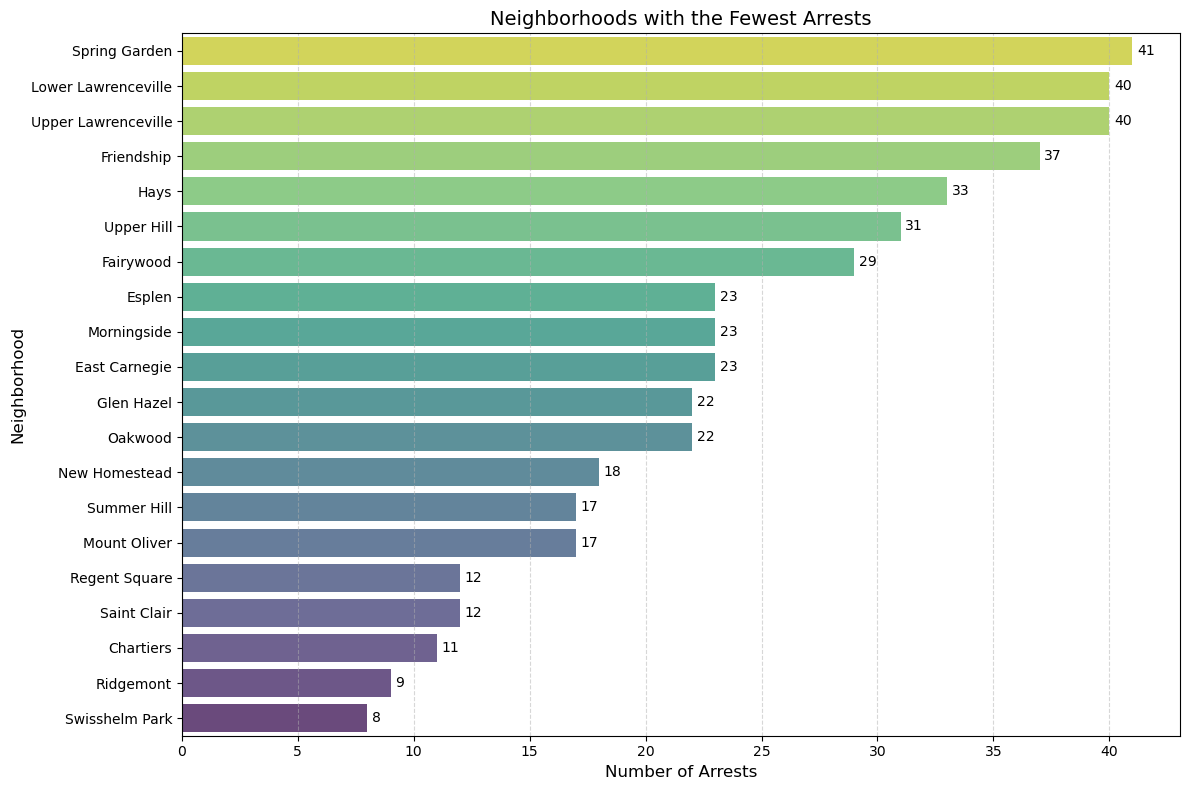

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("arrests.csv")

# Compute the 20 neighborhoods with the fewest arrests
bottom_20 = (
    data["Neighborhood"]
    .value_counts()
    .sort_values()
    .head(20)
)

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=bottom_20.values,
    y=bottom_20.index,
    palette="viridis",
    alpha=0.8
)

# Annotate bars with their values
for i, v in enumerate(bottom_20.values):
    ax.text(v + 0.2, i, str(v), va="center")

# Styling
ax.set_title("Neighborhoods with the Fewest Arrests", fontsize=14)
ax.set_xlabel("Number of Arrests", fontsize=12)
ax.set_ylabel("Neighborhood", fontsize=12)
ax.grid(axis="x", linestyle="--", alpha=0.5)

# Optionally invert so the smallest is at the top
ax.invert_yaxis()

plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
from tabulate import tabulate

# Load the arrests dataset
arrests_data = pd.read_csv("arrests.csv")

# Group by neighborhood and count the number of arrests
arrests_per_neighborhood = arrests_data['Neighborhood'].value_counts().reset_index()
arrests_per_neighborhood.columns = ['Neighborhood', 'Total Arrests']

# Sort by Total Arrests in ascending order
arrests_per_neighborhood = arrests_per_neighborhood.sort_values(by='Total Arrests', ascending=True)

# Display the 20 neighborhoods with the least arrests
print(tabulate(arrests_per_neighborhood.head(20), headers='keys', tablefmt='fancy_grid'))


╒════╤═════════════════════╤═════════════════╕
│    │ Neighborhood        │   Total Arrests │
╞════╪═════════════════════╪═════════════════╡
│ 90 │ Swisshelm Park      │               8 │
├────┼─────────────────────┼─────────────────┤
│ 89 │ Ridgemont           │               9 │
├────┼─────────────────────┼─────────────────┤
│ 88 │ Chartiers           │              11 │
├────┼─────────────────────┼─────────────────┤
│ 87 │ Saint Clair         │              12 │
├────┼─────────────────────┼─────────────────┤
│ 86 │ Regent Square       │              12 │
├────┼─────────────────────┼─────────────────┤
│ 85 │ Mount Oliver        │              17 │
├────┼─────────────────────┼─────────────────┤
│ 84 │ Summer Hill         │              17 │
├────┼─────────────────────┼─────────────────┤
│ 83 │ New Homestead       │              18 │
├────┼─────────────────────┼─────────────────┤
│ 82 │ Oakwood             │              22 │
├────┼─────────────────────┼─────────────────┤
│ 81 │ Glen H

# ANALYSIS


The neighborhoods with the **lowest arrest totals** are **Swisshelm Park** (8 arrests), **Ridgemont** (9), and **Chartiers** (11), suggesting these areas may be among the safest in Pittsburgh. Others like **Saint Clair** and **Regent Square** (both with 12 arrests) also rank very low. These low numbers may reflect strong community safety, less crime, or limited police activity in those neighborhoods.


In [6]:
import pandas as pd

# Load the arrests dataset
arrests_data = pd.read_csv("arrests.csv")

# Count total arrests per neighborhood (case-insensitive column fix)
arrests_grouped = arrests_data.groupby('Neighborhood', as_index=False).size()
arrests_grouped.columns = ['neighborhood', 'total_arrests']

# Score: lower arrests = higher safety score
arrests_grouped['safety_score'] = 1 - (arrests_grouped['total_arrests'] / arrests_grouped['total_arrests'].max())

# Preview safest neighborhoods
print(arrests_grouped.sort_values(by='safety_score', ascending=False).head())


      neighborhood  total_arrests  safety_score
82  Swisshelm Park              8      0.997117
67       Ridgemont              9      0.996757
20       Chartiers             11      0.996036
66   Regent Square             12      0.995676
68     Saint Clair             12      0.995676
